<a href="https://colab.research.google.com/github/GDianaS/machine-learning-basics/blob/main/05_Support_Vector_Regression_(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temos SVR, em vez de uma linha simples (como na Regressão Linear), você verá um tubo com uma determinada largura e aqui você tem a linha de regressão no meio.
>Quaisquer pontos em nosso conjunto de dados que caiam dentro do tubo serão desconsiderado seus erros (diferença entre o valor real e a predição). Ou seja uma margem de erro que estavamos dando ao nosso modelo, na qual não consideramos os erros dentro dela.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
dataset = pd.read_csv("Dataset/Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,-1].values 

In [ ]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
y = y.reshape(len(y),1)#linhas,colunas

In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


### Feature Scaling ###

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

#Não se deve usar o mesmo sc para escalar X e y, pois o fit calcula a media e desvio padrão de cada um
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [ ]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training the SVR model on the whole dataset ###

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

### Predicting a new result ###

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

### Visualising the results ###

<function matplotlib.pyplot.show(close=None, block=None)>

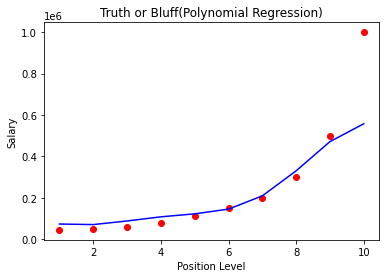

In [ ]:
#é preciso transformar os valores para seus valores originais
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color="blue")
plt.title('Truth or Bluff(S V Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

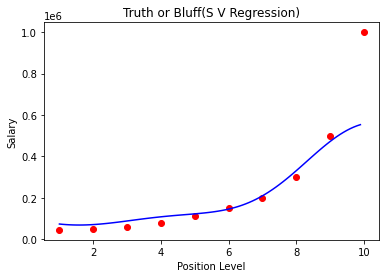

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color="blue")

plt.title('Truth or Bluff(S V Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show